In [0]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Train_v2.csv to Train_v2.csv
Saving VariableDefinitions.csv to VariableDefinitions.csv


In [0]:
data = pd.read_csv("Train_v2.csv")

variables = pd.read_csv("VariableDefinitions.csv")

In [5]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [7]:
data.shape

(23524, 13)

In [8]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

This show that the data is already cleaned

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [10]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


## Data visulasation

### Bar Chart for Categorical Features


In [0]:
def bar_chart(feature):
    account = data[data['bank_account']=='Yes'][feature].value_counts()
    no_account = data[data['bank_account']=='No'][feature].value_counts()
    df = pd.DataFrame([account,no_account])
    df.index = ['account','no_acccount']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

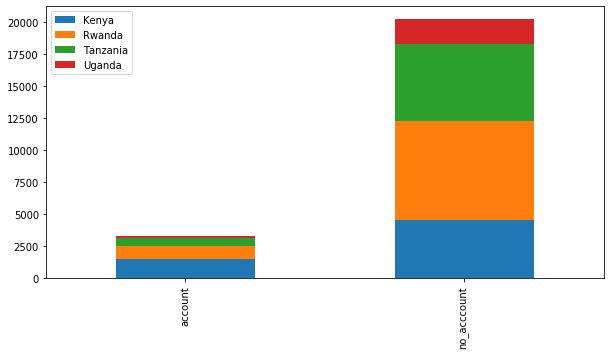

In [12]:
bar_chart('country')

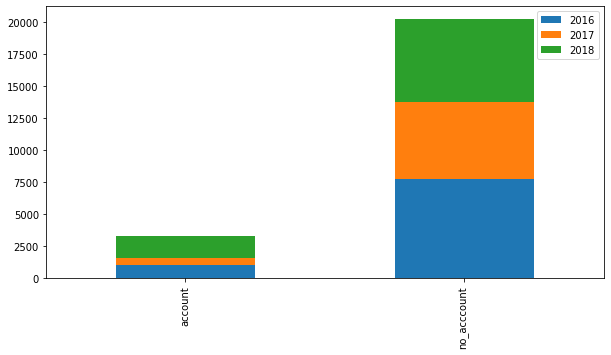

In [13]:
bar_chart('year')

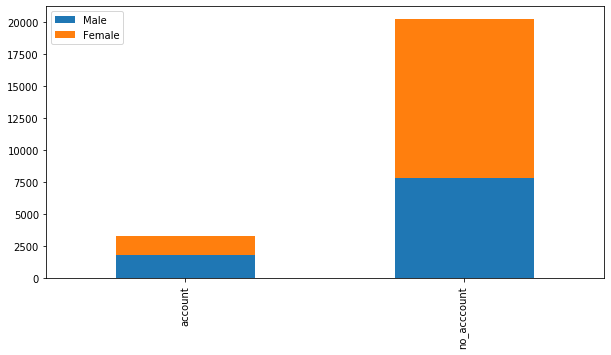

In [14]:
bar_chart('gender_of_respondent')

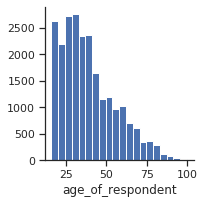

In [15]:
# Set plot style
sns.set(style='ticks', color_codes=True)

# Plot passenger age distribution
age_hist = sns.FacetGrid(data)
age_hist.map(plt.hist, 'age_of_respondent', bins=20)

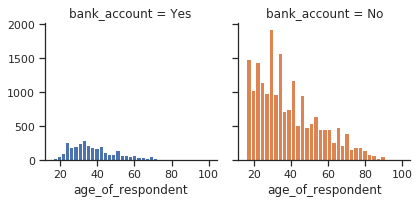

In [16]:
# Plot histogram of survival by age
age_hist = sns.FacetGrid(data, col='bank_account', hue='bank_account')
age_hist.map(plt.hist, 'age_of_respondent', bins=35)

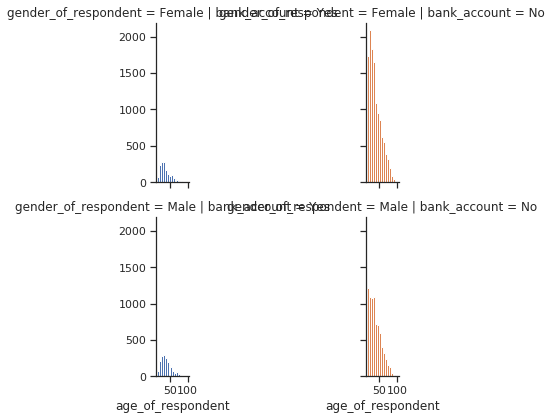

In [17]:
# Plot histogram by survival, sex, and age
age_sex_hist = sns.FacetGrid(data, col='bank_account', row='gender_of_respondent', hue='bank_account')
age_sex_hist.map(plt.hist, 'age_of_respondent', bins=15)

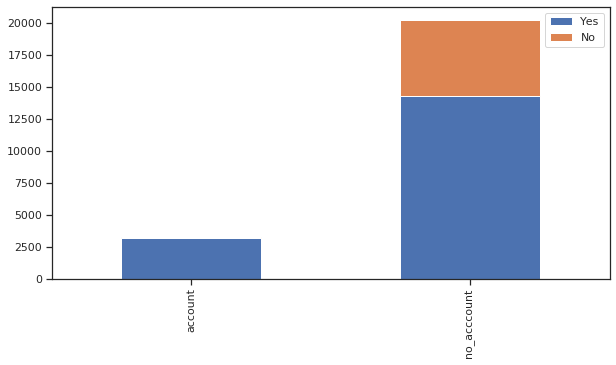

In [18]:
bar_chart('cellphone_access')

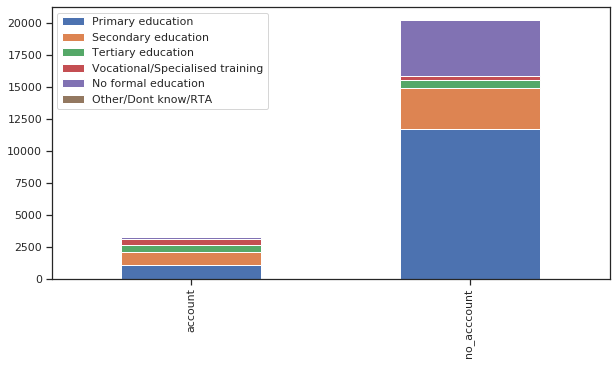

In [19]:
bar_chart('education_level') 

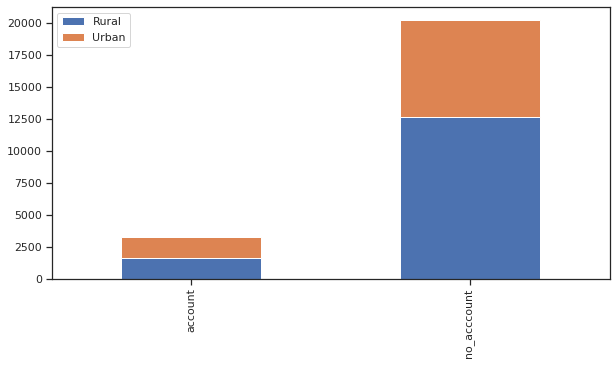

In [20]:
bar_chart('location_type')

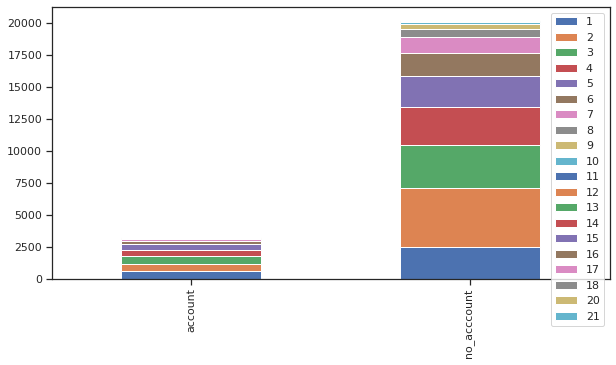

In [21]:
bar_chart('household_size')

### Data Preprocessing

### Building unique_Id with the new form :  uniqueid + " x " + country name


In [0]:
data["uniqueid"]= data["uniqueid"]+ " x " + data["country"]

### Categorical features label encooding



In [0]:

le = LabelEncoder()
data['gender_of_respondent'] = le.fit_transform(data['gender_of_respondent'])
data['bank_account'] = le.fit_transform(data['bank_account'])
data['cellphone_access'] = le.fit_transform(data['cellphone_access'])
data['location_type'] = le.fit_transform(data['location_type'])
data['relationship_with_head'] = le.fit_transform(data['relationship_with_head'])
data['gender_of_respondent'] = le.fit_transform(data['gender_of_respondent'])
data['marital_status'] = le.fit_transform(data['marital_status'])
data['education_level'] = le.fit_transform(data['education_level'])
data['job_type'] = le.fit_transform(data['job_type'])
data['country'] = le.fit_transform(data['country'])



In [24]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1 x Kenya,1,0,1,3,24,0,5,2,3,9
1,0,2018,uniqueid_2 x Kenya,0,0,0,5,70,0,1,4,0,4
2,0,2018,uniqueid_3 x Kenya,1,1,1,5,26,1,3,3,5,9
3,0,2018,uniqueid_4 x Kenya,0,0,1,5,34,0,1,2,2,3
4,0,2018,uniqueid_5 x Kenya,0,1,0,8,26,1,0,3,2,5


In [25]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

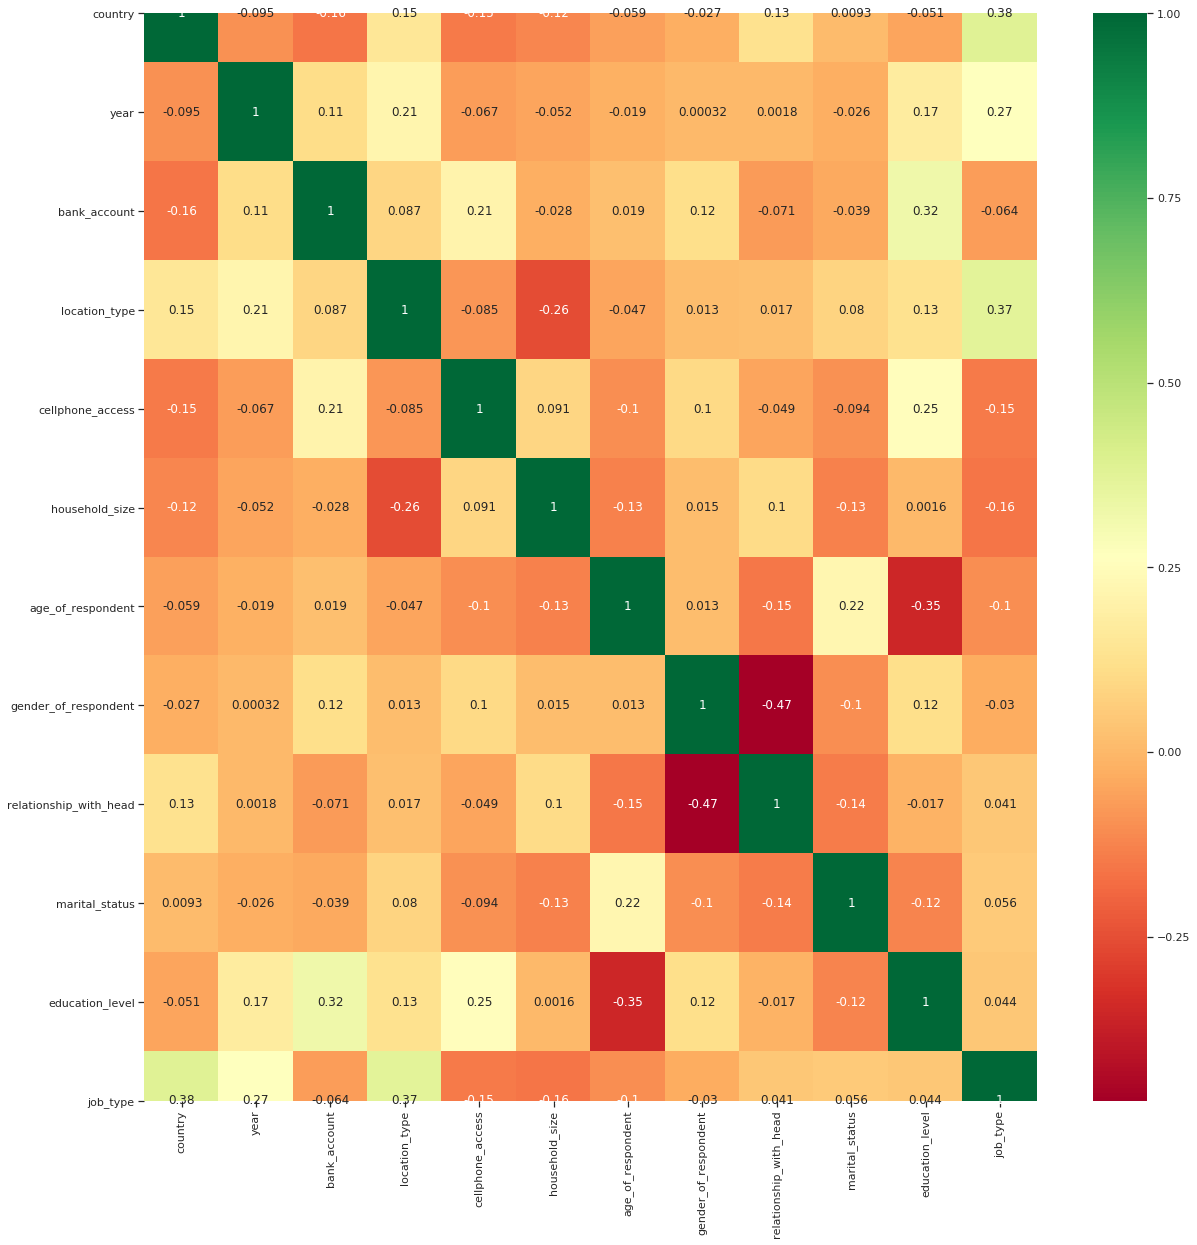

In [26]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
columns_train=[  'location_type','country', 'age_of_respondent',   'year',   'relationship_with_head',
       'cellphone_access',  'education_level', 'job_type' ]
columns_target=['bank_account']

X=data[columns_train]

Y=data[columns_target]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(X, Y, test_size=0.15, random_state=17)

In [0]:
#!pip install catboost

In [0]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb


### Random Forest classifier

In [34]:
model= RandomForestClassifier(n_estimators = 1500, random_state = 17)
model.fit(x_train,y_train);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [0]:
rd_predictions = model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score


# evaluate predictions
print("The accuracy of random forest was : "+   str(accuracy_score(y_test, rd_predictions)))

The accuracy of random forest was : 0.8625672995182772


### Xgboost classifier 

In [37]:
model = XGBClassifier(n_estimators=2000,learning_rate =0.1)
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_predictions = model.predict(x_test)


In [39]:

print("The accuracy of xgboost was : "+   str(accuracy_score(y_test, xgb_predictions)))

The accuracy of xgboost was : 0.880136015868518


### Catboost classifier

In [40]:
categ_feat_idx = np.where(x_train.dtypes == 'object')[0]
model = CatBoostClassifier(iterations=650, learning_rate= 0.05,cat_features=categ_feat_idx)
model.fit(x_train,y_train,verbose=False,) 

In [0]:
cat_predictions = model.predict(x_test)


In [42]:
print("The accuracy of catboost was : "+   str(accuracy_score(y_test, cat_predictions)))

The accuracy of catboost was : 0.8821195806177388


### Light GBM model

In [0]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label= y_train)
params = {}
params['learning_rate']= 0.0052
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='accuracy'
params['sub_feature']=0.6
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=12
params['verbosity']= -1
params['reg_alpha']=0.5
params['reg_lambda']=5
params['random_state']=17





model= lgb.train(params, d_train, 1000)

In [0]:
ltgbm_predictions = model.predict(x_test)
ltgbm_predictions = [int(round(value)) for value in ltgbm_predictions]

In [45]:
print("The accuracy of Light gbm was : "+   str(accuracy_score(y_test, ltgbm_predictions)))

The accuracy of Light gbm was : 0.8841031453669594


### Stacking model using lightgbm, xgboost and catboost

In [0]:

model1 = XGBClassifier(n_estimators=2000,learning_rate =0.1)
model2 = CatBoostClassifier(iterations=650, learning_rate= 0.05)
d_train = lgb.Dataset(x_train, label= y_train)
model3 = lgb.train(params, d_train, 1000)

In [47]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train,verbose=False)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
test_pred1 = model1.predict(x_test)
test_pred2 = model2.predict(x_test)
test_pred3 = model3.predict(x_test)
test_pred3 = [int(round(value)) for value in test_pred3]

In [0]:
stacked_test_pred = np.column_stack((test_pred1,test_pred2,test_pred3))

In [0]:
meta_model = model2 = CatBoostClassifier(iterations=650, learning_rate= 0.05)

In [51]:
meta_model.fit(stacked_test_pred, y_test,verbose=False)

In [0]:
stacked_pred= meta_model.predict(stacked_test_pred)


In [53]:
print("The accuracy of stack model was : "+   str(accuracy_score(y_test, stacked_pred)))

The accuracy of stack model was : 0.8855199773306885


### Deep Learning model 

In [140]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten,Dense, Dropout, Activation, LeakyReLU



Using TensorFlow backend.


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_train.shape[1],)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(70, input_dim=7),
    keras.layers.Dropout(0.2),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(50, input_dim=10),
    keras.layers.Dropout(0.1),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(1, input_dim=10),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [187]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Train on 19995 samples
Epoch 1/50
19995/19995 [==============================] - 2s 87us/sample - loss: 1.0242 - acc: 0.8080
Epoch 2/50
19995/19995 [==============================] - 2s 78us/sample - loss: 0.4249 - acc: 0.8580
Epoch 3/50
19995/19995 [==============================] - 2s 78us/sample - loss: 0.4100 - acc: 0.8599
Epoch 4/50
19995/19995 [==============================] - 2s 81us/sample - loss: 0.4059 - acc: 0.8599
Epoch 5/50
19995/19995 [==============================] - 2s 80us/sample - loss: 0.3934 - acc: 0.8599
Epoch 6/50
19995/19995 [==============================] - 2s 83us/sample - loss: 0.3774 - acc: 0.8604
Epoch 7/50
19995/19995 [==============================] - 2s 82us/sample - loss: 0.3673 - acc: 0.8607
Epoch 8/50
19995/19995 [==============================] - 2s 81us/sample - loss: 0.3555 - acc: 0.8623
Epoch 9/50
19995/19995 [==============================] - 2s 79us/sample - loss: 0.3491 - acc: 0.8627
Epoch 10/50
19995/19995 [==============================] - 

In [0]:
neural_net_predictions =  model.predict(x_test)
neural_net_predictions = [np.round(value) for value in neural_net_predictions]

In [189]:
print("The accuracy of the deep learning model  was : "+   str(accuracy_score(y_test, neural_net_predictions)))

The accuracy of the deep learning model  was : 0.8659676962312269


In [190]:
print("The accuracy of random forest was : "+   str(accuracy_score(y_test, rd_predictions)))
print("The accuracy of xgboost was : "+   str(accuracy_score(y_test, xgb_predictions)))
print("The accuracy of catboost was : "+   str(accuracy_score(y_test, cat_predictions)))
print("The accuracy of Light gbm was : "+   str(accuracy_score(y_test, ltgbm_predictions)))
print("The accuracy of stack model was : "+   str(accuracy_score(y_test, stacked_pred)))
print("The accuracy of the deep learning model  was : "+   str(accuracy_score(y_test, neural_net_predictions)))

The accuracy of random forest was : 0.8625672995182772
The accuracy of xgboost was : 0.880136015868518
The accuracy of catboost was : 0.8821195806177388
The accuracy of Light gbm was : 0.8841031453669594
The accuracy of stack model was : 0.8855199773306885
The accuracy of the deep learning model  was : 0.8659676962312269
